In [38]:
import pandas as pd 
import pickle 
import seaborn as  sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

def mean_of_each_fold(df,metric):
    t= df[df["metric"]==metric].groupby(["Dataset Name","Filtering Algorithm","Number of features selected (K)","Learning algorithm"]).mean().reset_index()
    return t
def best_of_dataset(df):
    idx=df.groupby(['Dataset Name'])['value'].idxmax()
    t=df.loc[idx]
    return t
    
def plot_diff(merged_df,metric):
    plt.figure(figsize=(20,10))
    sorted_df= merged_df.sort_values(by=["diff"],ascending=False)
    colors = [1 if c >= 0 else 0 for c in sorted_df["diff"]]

    ax=sns.barplot(x="Dataset Name",y="diff",data=sorted_df,hue=colors)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    #name the axis
    plt.xlabel('Dataset Name')
    plt.ylabel('Difference in preformance')
    plt.title("Difference in" +metric+" performance before and after using \naugmentation techniques, between different algorithms")
    plt.title("Difference in" +metric+" performance before and after using \naugmentation techniques, between different algorithms")

    plt.show()

In [39]:
column= ['metric', 'value', 'infrence_time', 'Learning algorithm', 'Number of features selected (K)', 'chosen_features', 'Selected Features scores',
 'Filtering Algorithm', 'Fold', 'fs_time', 'Dataset Name', 'Number of samples', 'Original Number of features', 'CV Method']
 
from os import listdir
from os.path import isfile, join


,Dataset Name,Filtering Algorithm,Number of features selected (K),Learning algorithm,value_x,infrence_time,Fold,fs_time,Number of samples,Original Number of features,value_y,diff
0,ARFF_Breast,Aug_ReliefF,25,LogisticRegression,0.824808,0.000299,0.0,1.222532,97.0,24188.0,0.931373,-0.106564
1,ARFF_CNS,Aug_f_classif,30,LogisticRegression,0.641026,0.000381,0.0,0.029035,60.0,7129.0,0.915751,-0.274725
2,ARFF_Leukemia,Aug_ReliefF,30,RandomForestClassifier,0.994894,0.002320,0.0,0.124384,72.0,7129.0,1.000000,-0.005106
3,ARFF_Lung,Aug_f_classif,25,RandomForestClassifier,0.993239,0.000542,5.5,0.074380,203.0,12600.0,0.996387,-0.003148
4,ARFF_Ovarian,Aug_f_classif,100,SVC,1.000000,0.000097,5.5,0.113676,253.0,15154.0,1.000000,0.000000
5,bioconductor_ALL,Aug_f_classif,3,LogisticRegression,0.732136,0.000154,5.5,0.052466,128.0,12625.0,0.937615,-0.205480
6,bioconductor_COPDSexualDimorphism,Aug_ReliefF,100,SVC,0.820912,0.000250,5.5,4.274634,229.0,14498.0,0.924869,-0.103957
7,bioconductor_DLBCL,Aug_f_classif,100,SVC,0.750693,0.000446,5.5,0.022964,194.0,3583.0,0.875123,-0.124430
8,bioconductor_bcellViper,Aug_ReliefF,100,LogisticRegression,0.981139,0.001076,5.5,2.208329,211.0,6249.0,0.986485,-0.005346
9,bioconductor_breastCancerVDX,Aug_ReliefF,5,LogisticRegression,0.947241,0.000058,5.5,13.447298,344.0,22284.0,0.966207,-0.018967


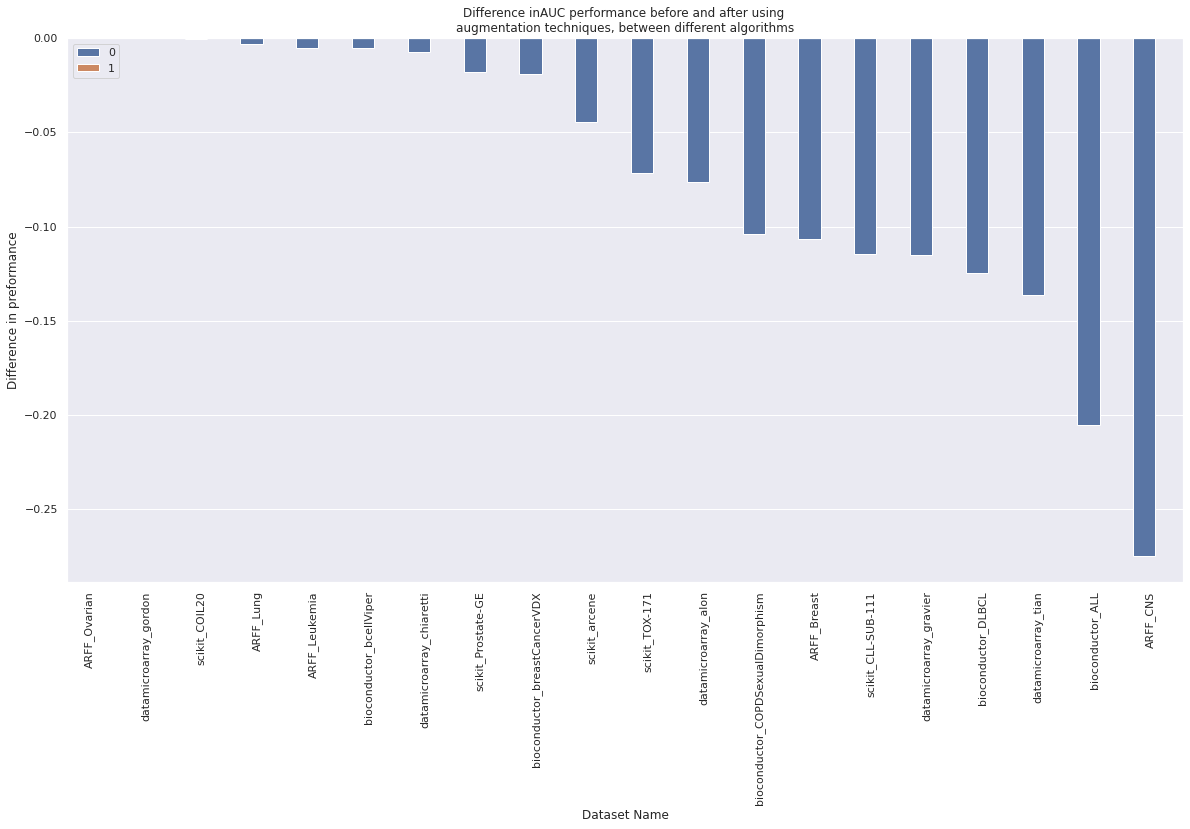

In [40]:
# for metric in ['accuracy', 'MCC', 'AUC', 'PR-AUC']:
for metric in ['AUC']:
    files= [f for f in listdir("../augmenrataion_res/") if isfile(join("../augmenrataion_res/", f))]
    all_files=[]
    for file in files:
        all_files.append(pd.read_csv("../augmenrataion_res/"+file,header=None))
    df= pd.concat(all_files, ignore_index=True)
    df.columns=column 
    mean_auc_df_aug= mean_of_each_fold(df,metric)


    files= [f for f in listdir("../results") if isfile(join("../results", f))]
    all_files=[]
    for file in files:
        all_files.append(pd.read_csv("../results/"+file,header=0))
    df= pd.concat(all_files, ignore_index=True)
    df.rename(columns={"index":"metric"},inplace=True)
    mean_auc_df= mean_of_each_fold(df,metric)


    best_df= best_of_dataset(mean_auc_df)

    merged_df= mean_auc_df_aug.merge(best_df[["Dataset Name","value"]],on=["Dataset Name"])
    merged_df["diff"]= merged_df["value_x"]-merged_df["value_y"]
    display(merged_df)
    plot_diff(merged_df,metric)

In [41]:
mean_auc_df_aug

,Dataset Name,Filtering Algorithm,Number of features selected (K),Learning algorithm,value,infrence_time,Fold,fs_time,Number of samples,Original Number of features
0,ARFF_Breast,Aug_ReliefF,25,LogisticRegression,0.824808,0.000299,0.0,1.222532,97.0,24188.0
1,ARFF_CNS,Aug_f_classif,30,LogisticRegression,0.641026,0.000381,0.0,0.029035,60.0,7129.0
2,ARFF_Leukemia,Aug_ReliefF,30,RandomForestClassifier,0.994894,0.002320,0.0,0.124384,72.0,7129.0
3,ARFF_Lung,Aug_f_classif,25,RandomForestClassifier,0.993239,0.000542,5.5,0.074380,203.0,12600.0
4,ARFF_Ovarian,Aug_f_classif,100,SVC,1.000000,0.000097,5.5,0.113676,253.0,15154.0
5,bioconductor_ALL,Aug_f_classif,3,LogisticRegression,0.732136,0.000154,5.5,0.052466,128.0,12625.0
6,bioconductor_COPDSexualDimorphism,Aug_ReliefF,100,SVC,0.820912,0.000250,5.5,4.274634,229.0,14498.0
7,bioconductor_DLBCL,Aug_f_classif,100,SVC,0.750693,0.000446,5.5,0.022964,194.0,3583.0
8,bioconductor_bcellViper,Aug_ReliefF,100,LogisticRegression,0.981139,0.001076,5.5,2.208329,211.0,6249.0
9,bioconductor_breastCancerVDX,Aug_ReliefF,5,LogisticRegression,0.947241,0.000058,5.5,13.447298,344.0,22284.0


In [42]:
best_df

,Dataset Name,Filtering Algorithm,Number of features selected (K),Learning algorithm,value,infrence_time,Fold,fs_time,Number of samples,Original Number of features
222,ARFF_Breast,ReliefF,25,LogisticRegression,0.931373,0.143663,0.0,2.397883,97.0,24188.0
827,ARFF_CNS,f_classif,30,LogisticRegression,0.915751,0.165202,0.0,0.031878,60.0,7129.0
1068,ARFF_Leukemia,ReliefF,30,RandomForestClassifier,1.000000,3.631772,0.0,0.166363,72.0,7129.0
1663,ARFF_Lung,f_classif,25,RandomForestClassifier,0.996387,0.000863,4.5,0.102427,203.0,12600.0
1737,ARFF_Ovarian,Genetic,100,LogisticRegression,1.000000,0.000040,4.5,8.035315,253.0,15154.0
2472,bioconductor_ALL,f_classif,3,LogisticRegression,0.937615,0.000002,4.5,0.058712,128.0,12625.0
2759,bioconductor_COPDSexualDimorphism,ReliefF,100,SVC,0.924869,0.000004,4.5,7.383736,229.0,14498.0
3359,bioconductor_DLBCL,f_classif,100,SVC,0.875123,0.000045,4.5,0.036908,194.0,3583.0
3597,bioconductor_bcellViper,ReliefF,100,LogisticRegression,0.986485,0.000012,4.5,73.147354,211.0,6249.0
3982,bioconductor_breastCancerVDX,ReliefF,5,LogisticRegression,0.966207,0.000032,4.5,53.897109,344.0,22284.0
